In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = 'wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [3]:
!wget $data -O data/housing_data_week_3.csv

--2022-09-23 14:54:37--  http://wget/
Resolviendo wget (wget)... falló: nodename nor servname provided, or not known.
wget: no se pudo resolver la dirección del equipo “wget”
--2022-09-23 14:54:37--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[185.199.111.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 1423529 (1.4M) [text/plain]
Grabando a: “data/housing_data_week_3.csv”

data/housing_data_w 100%[===================>]   1.36M  2.87MB/s    en 0.5s    

2022-09-23 14:54:38 (2.87 MB/s) - “data/housing_data_week_3.csv” guardado [1423529/1423529]

ACABADO --2022-09-23 14:54:38--
Tiempo total de reloj: 1.0s
Descargados: 1 ficheros, 1.4M en 0.5s (2.87 MB/s)


In [4]:
df = pd.read_csv('data/housing_data_week_3.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#Features
base = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']

In [6]:
#Data preparation
df = df[base]
df = df.fillna(0)
df['rooms_per_household'] = round(df['total_rooms']/df['households'],3)
df['bedrooms_per_room'] = round(df['total_bedrooms']/df['total_rooms'],3)
df['population_per_household'] = round(df['population']/df['households'],3)

In [7]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984,0.147,2.556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238,0.156,2.110
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288,0.130,2.802
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817,0.184,2.548
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.282,0.172,2.181


# Question 1

In [8]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
#Split the data
from sklearn.model_selection import train_test_split

In [10]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42, )
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42, )

In [11]:
len (df), len(df_train), len(df_val), len(df_test)

(20640, 12384, 4128, 4128)

In [12]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [13]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [14]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Question 2

In [15]:
df_train.dtypes

latitude                    float64
longitude                   float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [16]:
df_train.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [17]:
numerical = ['latitude', 'longitude', 'housing_median_age', 
             'total_rooms','total_bedrooms', 'population', 
             'households', 'median_income', 'rooms_per_household', 
             'bedrooms_per_room', 'population_per_household']
categorical = ['ocean_proximity']

In [18]:
data = {}
for column in numerical:
    corr_list = list(df_train[numerical].corrwith(df_train[column]).round(3))
    data[column] = corr_list

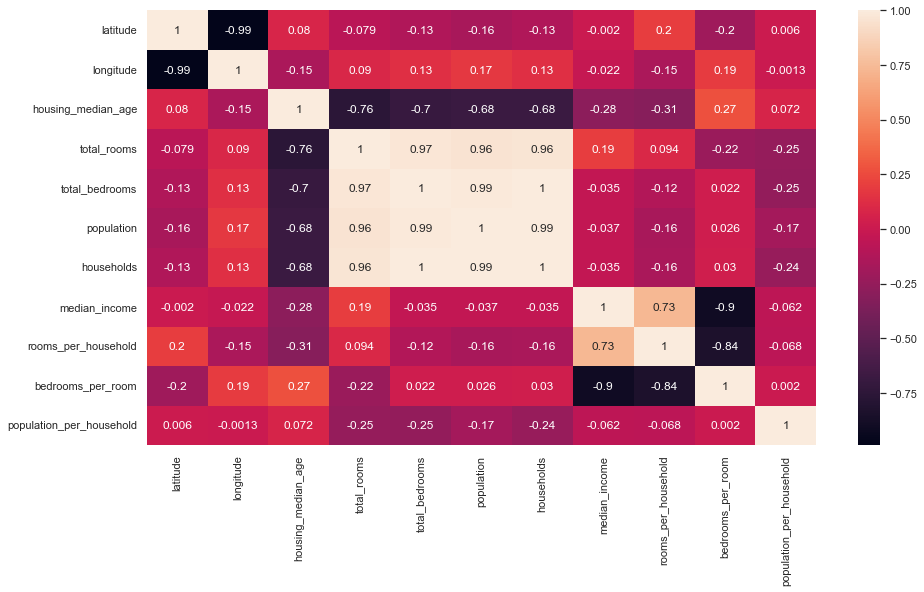

In [19]:
import seaborn as sn
df_corr = pd.DataFrame(data,columns=numerical)
sn.set(rc = {'figure.figsize':(15,8)})

corrMatrix = df_corr.corr()
sn.heatmap(corrMatrix, annot=True, )


plt.show()
#total_bedrooms and households

In [20]:
# Make median_house_value binary
y_train.mean()

206807.7419250646

In [21]:
y_train_above_average = (y_train > y_train.mean()).astype(int)

In [22]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922,0.260,3.754
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.565,0.130,2.789
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908,0.235,2.540
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201,0.194,2.059
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010,0.140,2.516


# Question 3

In [23]:
from sklearn.metrics import mutual_info_score

In [24]:
mutual_info_score(y_train_above_average, df_train.ocean_proximity)

0.10138385763624205

In [25]:
score = mutual_info_score(y_train_above_average, df_train.ocean_proximity)

In [26]:
round(score, 2)

0.1

# Question 4

In [27]:
#One-hot encoding
from sklearn.feature_extraction import DictVectorizer

train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [28]:
train_dict[0]

{'ocean_proximity': '<1H OCEAN',
 'latitude': 34.43,
 'longitude': -119.67,
 'housing_median_age': 39.0,
 'total_rooms': 1467.0,
 'total_bedrooms': 381.0,
 'population': 1404.0,
 'households': 374.0,
 'median_income': 2.3681,
 'rooms_per_household': 3.922,
 'bedrooms_per_room': 0.26,
 'population_per_household': 3.754}

In [29]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [30]:
X_train = dv.transform(train_dict)

In [31]:
#Training logistic regression
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [33]:
model.fit(X_train, y_train_above_average)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [34]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [35]:
model.predict_proba(X_val)

array([[0.9227409 , 0.0772591 ],
       [0.79635784, 0.20364216],
       [0.04654419, 0.95345581],
       ...,
       [0.03443674, 0.96556326],
       [0.14514047, 0.85485953],
       [0.56625704, 0.43374296]])

In [36]:
y_pred = model.predict_proba(X_val)[:,1]

In [37]:
decision = (y_pred >= 0.5)

In [38]:
y_val_above_average = (y_val > y_val.mean()).astype(int)

In [39]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = decision.astype(int)
df_pred['actual'] = y_val_above_average

In [40]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [41]:
round(df_pred.correct.mean(),2)

0.84

# Question 5

In [42]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

{'bedrooms_per_room': 0.628,
 'households': 0.004,
 'housing_median_age': 0.037,
 'latitude': 0.154,
 'longitude': 0.099,
 'median_income': 1.224,
 'ocean_proximity=<1H OCEAN': 0.515,
 'ocean_proximity=INLAND': -1.782,
 'ocean_proximity=ISLAND': 0.065,
 'ocean_proximity=NEAR BAY': 0.087,
 'ocean_proximity=NEAR OCEAN': 0.898,
 'population': -0.002,
 'population_per_household': 0.01,
 'rooms_per_household': -0.008,
 'total_bedrooms': 0.002,
 'total_rooms': -0.0}

In [81]:
difference = {}
for column in df_train.columns:
    
        df_small_train = df_train.copy()
        df_small_val = df_val.copy()
        
        del df_small_train[column]
        del df_small_val[column]
        
        columns_small = df_small_train.columns
        
        #one-hot encoing
        train_small_dict = df_small_train[columns_small].to_dict(orient='records')

        dv_small = DictVectorizer(sparse=False)
        dv_small.fit(train_small_dict)
        X_small_train = dv_small.transform(train_small_dict)
        
        #Training logistic regression
        model_small = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
        model_small.fit(X_small_train, y_train_above_average)
        
        val_small_dict = df_small_val[columns_small].to_dict(orient='records')
        X_small_val = dv_small.transform(val_small_dict)
        
        model_small.predict_proba(X_small_val)
        y_small_pred = model_small.predict_proba(X_small_val)[:,1]
        decision_small = (y_small_pred >= 0.5)

        df_small_pred = pd.DataFrame()
        df_small_pred['probability'] = y_small_pred
        df_small_pred['prediction'] = decision_small.astype(int)
        df_small_pred['actual'] = y_val_above_average

        df_small_pred['correct'] = df_small_pred.prediction == df_small_pred.actual

        accurrancy = round(df_small_pred.correct.mean(),2)
        
        difference[column] = abs((accurrancy - df_pred.correct.mean()))

In [82]:
min_dic = list(zip(difference.values(),difference.keys()))
sorted(min_dic)

[(0.004001937984496107, 'bedrooms_per_room'),
 (0.004001937984496107, 'population_per_household'),
 (0.004001937984496107, 'rooms_per_household'),
 (0.004001937984496107, 'total_bedrooms'),
 (0.004001937984496107, 'total_rooms'),
 (0.005998062015503902, 'households'),
 (0.005998062015503902, 'housing_median_age'),
 (0.005998062015503902, 'latitude'),
 (0.005998062015503902, 'longitude'),
 (0.005998062015503902, 'population'),
 (0.01599806201550391, 'ocean_proximity'),
 (0.04599806201550383, 'median_income')]

In [62]:
df_pred.correct.mean()

0.8359980620155039

# Question 6

In [67]:
#linear regression model from Scikit-Learn
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [68]:
#logarithmic transformation
y_log_train = np.log1p(y_train)
y_val_train = np.log1p(y_val)

In [69]:
alpha = [0, 0.01, 0.1, 1, 10]

In [70]:
scores = {}

In [71]:
for a in alpha:
    model_ridge = Ridge(alpha=a, solver="sag", random_state=42)
    model_ridge.fit(X_train, y_log_train)
    pred = model_ridge.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val_train,pred))
    scores[a]=round(rmse,3)

In [72]:
scores

{0: 0.524, 0.01: 0.524, 0.1: 0.524, 1: 0.524, 10: 0.524}